([<matplotlib.patches.Wedge at 0x14ed7fb0ad0>,
 [Text(0.980107155175532, 0.49938959177552517, 'Frogs'),
  Text(-0.339918873399729, 1.0461621095732052, 'Hogs'),
  Text(-0.4993892587836722, -0.9801073248433024, 'Dogs'),
  Text(1.0461621838648125, -0.339918644753721, '测试')])

D:\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) Arial.
  func(*args, **kwargs)
D:\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from font(s) Arial.
  func(*args, **kwargs)
D:\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


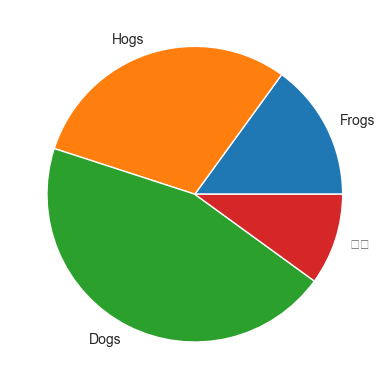

In [1]:
import matplotlib.pyplot as plt
labels = 'Frogs', 'Hogs', 'Dogs', '测试'
sizes = [15, 30, 45, 10]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [2]:
# noqa: E501
import numpy as np

from bokeh.layouts import column, gridplot
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.transform import linear_cmap, log_cmap

x = np.random.random(size=2000) * 1000
y = np.random.normal(size=2000) * 2 + 5
source = ColumnDataSource(dict(x=x, y=y))

def make_plot(mapper, palette):
    cmap = mapper("x", palette=palette, low=1, high=1000)
    axis_type = mapper.__name__.split("_")[0] # linear or log

    p = figure(x_range=(1, 1000), title=f"{palette} with {mapper.__name__}",
               toolbar_location=None, tools="", x_axis_type=axis_type)

    r = p.scatter('x', 'y', alpha=0.8, source=source, color=cmap)

    color_bar = r.construct_color_bar(padding=0,
                                      ticker=p.xaxis.ticker,
                                      formatter=p.xaxis.formatter)
    p.add_layout(color_bar, 'below')

    return p

p1 = make_plot(linear_cmap, "Viridis256")
p2 = make_plot(log_cmap, "Viridis256")
p3 = make_plot(linear_cmap, "Viridis6")
p4 = make_plot(log_cmap, "Viridis6")

p5 = figure(x_range=(1, 1000), width=800, height=300, toolbar_location=None, tools="",
            title="Viridis256 with linear_cmap, low/high = 200/800 = pink/grey")
cmap = linear_cmap("x", palette="Viridis256", low=200, high=800,
                   low_color="pink", high_color="darkgrey")
p5.scatter(x='x', y='y', alpha=0.8, source=source, color=cmap)

grid =  gridplot([[p1, p2], [p3, p4]], width=400, height=300, toolbar_location=None)
show(column(grid, p5))

ModuleNotFoundError: No module named 'bokeh'

In [2]:
import numpy as np

from bokeh.plotting import figure, show

N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = np.array([(r, g, 150) for r, g in zip(50+2*x, 30+2*y)], dtype="uint8")

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,examine,help"

p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

show(p)

ValueError: unexpected tool name 'examine', possible tools are pan, xpan, ypan, xwheel_pan, ywheel_pan, wheel_zoom, xwheel_zoom, ywheel_zoom, zoom_in, xzoom_in, yzoom_in, zoom_out, xzoom_out, yzoom_out, click, tap, doubletap, crosshair, box_select, xbox_select, ybox_select, poly_select, lasso_select, box_zoom, xbox_zoom, ybox_zoom, save, undo, redo, reset, help, box_edit, line_edit, point_draw, poly_draw, poly_edit, freehand_draw or hover

In [3]:
from matplotlib.markers import MarkerStyle
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.transforms import Affine2D


text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontfamily='monospace')
marker_style = dict(linestyle=':', color='0.8', markersize=10,
                    markerfacecolor="tab:blue", markeredgecolor="tab:blue")


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()


def split_list(a_list):
    i_half = len(a_list) // 2
    return a_list[:i_half], a_list[i_half:]

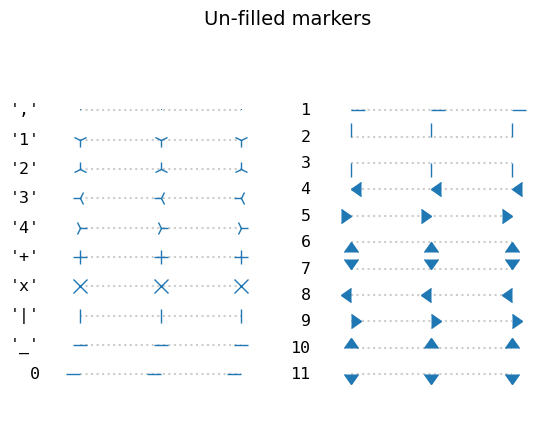

In [4]:
fig, axs = plt.subplots(ncols=2)
fig.suptitle('Un-filled markers', fontsize=14)

# Filter out filled markers and marker settings that do nothing.
unfilled_markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing' and m not in Line2D.filled_markers]

for ax, markers in zip(axs, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)